## Week 5: Introduction to neural Networks

### <font color=green>Solutions</font> <br>

### Perceptron learning rule

This week, we will start working with neural networks. For each of the exercises below you can use the method of your choice but you should display the final boundary of your classifier.

#### Exercise 1. 
As a first exercise, load the binary dataset below and code a few steps of the perceptron learning rule. 

In [84]:
# 


import scipy.io as sio
data1 = sio.loadmat('perceptron_data_class1.mat')
data2 = sio.loadmat('perceptron_data_class2.mat')

from numpy import linalg as LA

data1 = data1['perceptron_data_class1']
data2 = data2['perceptron_data_class2']

# We first build the matrix of features (here [1, x, y])

sz1 = np.shape(data1)
sz2 = np.shape(data2)

targetsClass1 = np.ones((sz1[0],))
targetsClass2 = -1 * np.ones((sz2[0],))

total_targets = np.hstack((targetsClass1, targetsClass2))
total_data = np.vstack((data1, data2))

# precomputing the product y(x_i)t_i
product_yiti = np.multiply(np.vstack((data1, data2)),(np.ones((2,1))* total_targets).T)


total_Xtilde = np.hstack((np.ones((np.shape(total_data)[0],1)), total_data))

# Then we initialize the beta_tilde (here I chose to take beta_tilde random Gaussian but any other choice is also possible)

sigma = 1
beta = np.random.normal(0, 1, (2,))
beta0 = np.random.normal(0, 1, 1)

beta_tilde_int = np.hstack((beta0, beta))
betaTotal = beta_tilde_int

# Initialization of the max number of iter and learning rate
eta = .01
iter_num = 1
max_iter = 100


while iter_num < 200:
    
    
    # We start by looking for the misclassified points (in the case of the perceptron, 
    # the misclassified points are the points for which the sign of the product y(x_i)t_i is negative)
    
    sign = np.sign(np.multiply(np.matmul(betaTotal,total_Xtilde.T),total_targets))
    ind_misclassified = np.where(sign < 0)
    misclassified_targets = total_targets[sign < 0]
    # we then extract the misclassified products $x_it_i$
    misclassified_yiti = product_yiti[sign < 0,:]
    # now summing each of the misclassified vectors to get the gradient, we get  
    gradient_beta0 = np.sum(misclassified_targets, axis=0)
    gradient_beta = np.sum(misclassified_yiti, axis=0)
    gradient_betaTotal = np.hstack((gradient_beta0, gradient_beta))
    print('gradient')
    print(gradient_betaTotal)
    print('norm of gradient')
    print(LA.norm(gradient_betaTotal))
    if LA.norm(gradient_betaTotal)!=0:
        gradient_betaTotal = np.true_divide(gradient_betaTotal,LA.norm(gradient_betaTotal))
    
    print(gradient_beta)
    
    # updating Beta with learning rate eta
    betaTotal += gradient_betaTotal * eta

 
    iter_num +=1
    print(iter_num)



gradient
[ 22.         372.75345622 793.64963504]
norm of gradient
877.1025494880358
[372.75345622 793.64963504]
2
gradient
[ 22.         372.75345622 793.64963504]
norm of gradient
877.1025494880358
[372.75345622 793.64963504]
3
gradient
[ 22.         372.75345622 793.64963504]
norm of gradient
877.1025494880358
[372.75345622 793.64963504]
4
gradient
[ 22.         372.75345622 793.64963504]
norm of gradient
877.1025494880358
[372.75345622 793.64963504]
5
gradient
[ 22.         372.75345622 793.64963504]
norm of gradient
877.1025494880358
[372.75345622 793.64963504]
6
gradient
[ 22.         372.75345622 793.64963504]
norm of gradient
877.1025494880358
[372.75345622 793.64963504]
7
gradient
[ 22.         372.75345622 793.64963504]
norm of gradient
877.1025494880358
[372.75345622 793.64963504]
8
gradient
[ 22.         372.75345622 793.64963504]
norm of gradient
877.1025494880358
[372.75345622 793.64963504]
9
gradient
[ 22.         372.75345622 793.64963504]
norm of gradient
877.102549488

gradient
[0. 0. 0.]
norm of gradient
0.0
[0. 0.]
191
gradient
[0. 0. 0.]
norm of gradient
0.0
[0. 0.]
192
gradient
[0. 0. 0.]
norm of gradient
0.0
[0. 0.]
193
gradient
[0. 0. 0.]
norm of gradient
0.0
[0. 0.]
194
gradient
[0. 0. 0.]
norm of gradient
0.0
[0. 0.]
195
gradient
[0. 0. 0.]
norm of gradient
0.0
[0. 0.]
196
gradient
[0. 0. 0.]
norm of gradient
0.0
[0. 0.]
197
gradient
[0. 0. 0.]
norm of gradient
0.0
[0. 0.]
198
gradient
[0. 0. 0.]
norm of gradient
0.0
[0. 0.]
199
gradient
[0. 0. 0.]
norm of gradient
0.0
[0. 0.]
200


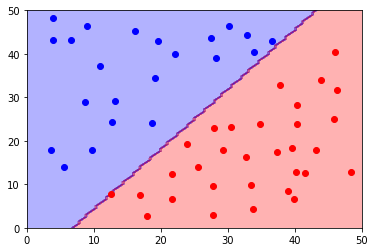

In [86]:
import numpy as np

# we now plot the classification

xx, yy = np.meshgrid(np.linspace(0,50,100),
                           np.linspace(0,50,100))
        
        
tmp = np.array([xx.ravel(), yy.ravel()]).T
tmp1 = np.ones((np.shape(tmp)[0],1))

phi_tilde = np.hstack((tmp1, tmp))


import matplotlib.pyplot as plt

C = np.array([ 'Red','Blue'])

Z = np.matmul(betaTotal, phi_tilde.T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, np.sign(Z), alpha=0.3, colors=C)

plt.scatter(data1[:,0], data1[:,1], facecolor='blue')
plt.scatter(data2[:,0], data2[:,1], facecolor='red')
plt.show()




#### Exercise 2.

__2a.__ Load the data below. Using the neural_network module from scikit-learn and its MLPClassifier model, learn a classifier, for the dataset below using 

- One hidden layer with a linear activation function and 
    - One neuron
    - Two neurons
    
    
    
- One hidden layer with a non linear activation function (take Relu for example or a binary step)
    - One neuron
    - Two neurons

How many neurons, hidden layers do you need to learn the distribution of the data? Do you have an idea why?

Try increasing the number of neurons and hidden layers. Then try different values of the learning rate. 


172
195
(172,)
(195,)
(367,)


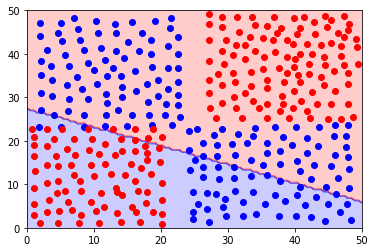

In [160]:
## 1) This is the solution for the one neuron exercise
import scipy.io as sio
data1 = sio.loadmat('neural_net_class1.mat')
data2 = sio.loadmat('neural_net_class2.mat')

data1 = data1['neural_net_class1']
data2 = data2['neural_net_class2']

from sklearn.neural_network import MLPClassifier

# put your code here

import matplotlib.pyplot as plt
import numpy as np


sz1 = np.shape(data1)
sz2 = np.shape(data2)
targetsClass1 = np.ones((sz1[0],))
targetsClass2 = -1 * np.ones((sz2[0],))

total_targets = np.hstack((targetsClass1, targetsClass2))

total_data = np.vstack((data1, data2))

from sklearn.neural_network import MLPClassifier

my_classifier = MLPClassifier(hidden_layer_sizes = 1, activation = 'identity')

my_classifier.fit(total_data, total_targets)


from matplotlib.colors import ListedColormap
# plot the decision surface
    
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
    
xx, yy = np.meshgrid(np.linspace(0,50,100),
                           np.linspace(0,50,100))
Z = my_classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.scatter(data1[:,0], data1[:,1], facecolor='blue')
plt.scatter(data2[:,0], data2[:,1], facecolor='red')
plt.show()

## 2) Adding a couple more neurons won't change the ouptut a lot. 

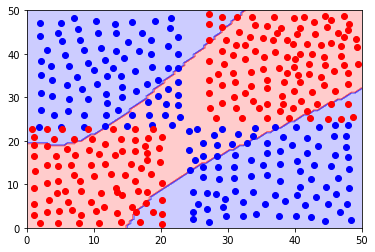

In [164]:

## 2) Using a non linear activation function 


my_classifier = MLPClassifier(hidden_layer_sizes = (100,), activation = 'relu')

my_classifier.fit(total_data, total_targets)


from matplotlib.colors import ListedColormap
# plot the decision surface
    
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
    
xx, yy = np.meshgrid(np.linspace(0,50,100),
                           np.linspace(0,50,100))
Z = my_classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.scatter(data1[:,0], data1[:,1], facecolor='blue')
plt.scatter(data2[:,0], data2[:,1], facecolor='red')
plt.show()


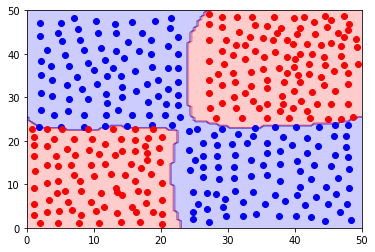

In [149]:
## 3) changing the learning rate
## Try various values for the learning rate between .0001 and 1. What do you observe ?

my_classifier = MLPClassifier(hidden_layer_sizes = (20,20,20), activation = 'relu', learning_rate  = 'constant', learning_rate_init =.001, max_iter=20000)

my_classifier.fit(total_data, total_targets)


from matplotlib.colors import ListedColormap
# plot the decision surface
    
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
    
xx, yy = np.meshgrid(np.linspace(0,50,100),
                           np.linspace(0,50,100))
Z = my_classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.scatter(data1[:,0], data1[:,1], facecolor='blue')
plt.scatter(data2[:,0], data2[:,1], facecolor='red')
plt.show()




__2b.__ Keep the dataset from above. try to change the intialization of the training algorithm. Plot the resulting classifier for a couple of different initializations. What do you see?

Do it for a small network first. Then repeat those experiments for larger architectures. I.e. increase the number of neurons and the number of layers. What do you see when you change the initialization?


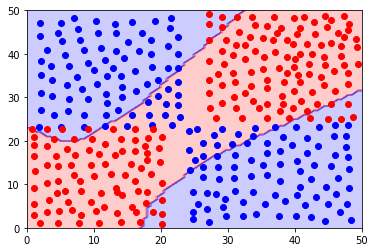

In [9]:

# Although it is a little more tricky, it is possible to use object oriented programming and inheritance to modify 
# the _init_coef method from the MLPClassifier class in scikit learn. As an illustration of this, in the example below, 
# we replace the built-in initialization of the MLP class and replace the initial weights by zeros. 

from sklearn.neural_network import MLPClassifier

class MLPClassifierOverride(MLPClassifier):

    def _init_coef(self, fan_in, fan_out):
        
        if self.activation == 'logistic':
            
            init_bound = np.sqrt(2. / (fan_in + fan_out))
            
        elif self.activation in ('identity', 'tanh', 'relu'):
                
            init_bound = np.sqrt(6. / (fan_in + fan_out))
                
        else:
                
            raise ValueError("Unknown activation function %s" %
                         self.activation)
        coef_init = np.zeros(np.shape(self._random_state.uniform(-init_bound, init_bound,
                                               (fan_in, fan_out))))

        intercept_init = np.zeros(np.shape(self._random_state.uniform(-init_bound, init_bound,
                                                    fan_out)))
        return coef_init, intercept_init



## Try various values for the learning rate between .0001 and 1. What do you observe ?

import scipy.io as sio
data1 = sio.loadmat('neural_net_class1.mat')
data2 = sio.loadmat('neural_net_class2.mat')

data1 = data1['neural_net_class1']
data2 = data2['neural_net_class2']

from sklearn.neural_network import MLPClassifier

# put your code here

import matplotlib.pyplot as plt
import numpy as np


sz1 = np.shape(data1)
sz2 = np.shape(data2)
targetsClass1 = np.ones((sz1[0],))
targetsClass2 = -1 * np.ones((sz2[0],))

total_targets = np.hstack((targetsClass1, targetsClass2))

total_data = np.vstack((data1, data2))

my_classifier = MLPClassifier(hidden_layer_sizes = (100,), activation = 'relu', learning_rate  = 'constant', learning_rate_init =.001)

my_classifier.fit(total_data, total_targets)

from matplotlib.colors import ListedColormap
## plot the decision surface
    
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
    
xx, yy = np.meshgrid(np.linspace(0,50,100),
                           np.linspace(0,50,100))
Z = my_classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.scatter(data1[:,0], data1[:,1], facecolor='blue')
plt.scatter(data2[:,0], data2[:,1], facecolor='red')
plt.show()




#### Exercise 3. 

__3a.__Load the data below. Try to build the best neural network you can for this dataset. Split the data between a training and a test set and evaluate the models you built. What is the best validation error you can get?


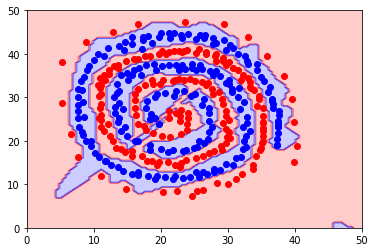

In [54]:
# The spiral is relatively hard because of its strong non-linearity. However, as shown below, 
# it remains of course possible to fit it with a neural network provided that (1) the network is sufficiently over-parametrized 
# (i.e. taking a sufficiently large number of layers and neurons in each layer) and (2) that one takes a sufficiently 
# small learning with a (batch) gradient descent algorithm (taking all the samples into account, thus avoiding any randomness in the iterations). 
# To avoid disproportionate complexity of the classifier, it is also good to set the regularization parameter to some relatively 
# large constant, here I choose alpha = .1


import scipy.io as sio
data1 = sio.loadmat('neural_net_ex2_class1.mat')
data2 = sio.loadmat('neural_net_ex2_class2.mat')

data1 = data1['neural_net_ex2_class1']
data2 = data2['neural_net_ex2_class2']


from sklearn.neural_network import MLPClassifier

# put your code here

import matplotlib.pyplot as plt
import numpy as np

sz1 = np.shape(data1)
sz2 = np.shape(data2)
targetsClass1 = np.ones((sz1[0],))
targetsClass2 = -1 * np.ones((sz2[0],))

total_targets = np.hstack((targetsClass1, targetsClass2))
total_data = np.vstack((data1, data2))

from sklearn.neural_network import MLPClassifier

## We first try a simple MLP with Relu activation and without any additional features

my_classifier = MLPClassifier(hidden_layer_sizes = (100,100), activation = 'tanh', max_iter=40000, solver = 'lbfgs', alpha = .1)

my_classifier.fit(total_data, total_targets)


from matplotlib.colors import ListedColormap
# plot the decision surface
    
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
    
xx, yy = np.meshgrid(np.linspace(0,50,100),
                           np.linspace(0,50,100))
Z = my_classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)



plt.scatter(data1[:,0], data1[:,1], facecolor='blue')
plt.scatter(data2[:,0], data2[:,1], facecolor='red')
plt.show()


__3b.__ With the same dataset, add additional features to your model, e.g. $\sin(x), \sin(y)$ or other monomials. Can you improve your classifier ?

In [ ]:
# Even when using Neural networks, it might be interesting to add additional features. Not because the network won't 
# be able to learn the classifier, in fact we know from the Universal approximation Theorem that a sufficiently large 
# Perceptron can learn any distribution, but because adding a couple of features such as sin(x), cos(x) and x^2, y^2 
# might lead to a simpler architecture. Random initialization however makes the learning tricky. 



Why is the spiral example so difficult to learn?

(557, 2)


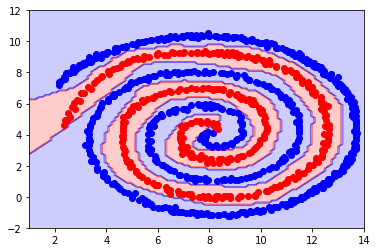

In [42]:
## 1) Once again, the difficulty for the spiral comes from the strong non linearity of the data. Such a non linearity 
# requires a sufficiently large architecture and some relatively good intuition on the way neural networks can capture a 
# distribution. However, as shown below on yet another example, neural networks are perfectly able to recover a 
# relatively regular boundary even on such strongly non linear dataset. 

import numpy as np
import scipy.io as sio
data1 = sio.loadmat('pointsSpiralClass1_1.mat')
data2 = sio.loadmat('pointsSpiralClass1_2.mat')
data3 = sio.loadmat('pointsSpiralClass2_1.mat')


data1 = data1['pointsSpiralClass1_1']
data2 = data2['pointsSpiralClass1_2']
data3 = data3['pointsSpiralClass2_1']



data1 = np.vstack((data1,data2))
print(np.shape(data1))

sz1 = np.shape(data1)
sz2 = np.shape(data3)

targets_class1 = np.ones((sz1[0],))
targets_class2 = -1*np.ones((sz2[0],))



total_data = np.vstack((data1, data3))
total_targets = np.hstack((targets_class1, targets_class2))

from sklearn.neural_network import MLPClassifier

## We first try a simple MLP with Relu activation and without any additional features

my_classifier = MLPClassifier(hidden_layer_sizes = (100,100), activation = 'tanh', max_iter=10000, batch_size=1000,learning_rate_init=0.001)

my_classifier.fit(total_data, total_targets)

from matplotlib.colors import ListedColormap

colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:2])
    
xx, yy = np.meshgrid(np.linspace(1,14,100),
                           np.linspace(-2,12,100))

preprocessed = np.array([xx.ravel(), yy.ravel()]).T

# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(2)
# preprocessed = poly.fit_transform(preprocessed)
# preprocessed = preprocessed[:,1:]
# preprocessed = np.hstack((preprocessed,np.sin(preprocessed)) )

Z = my_classifier.predict(preprocessed)
Z = Z.reshape(xx.shape)


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.2, cmap=cmap)
plt.scatter(data1[:,0], data1[:,1], facecolor='blue')
plt.scatter(data3[:,0], data3[:,1], facecolor='red')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


